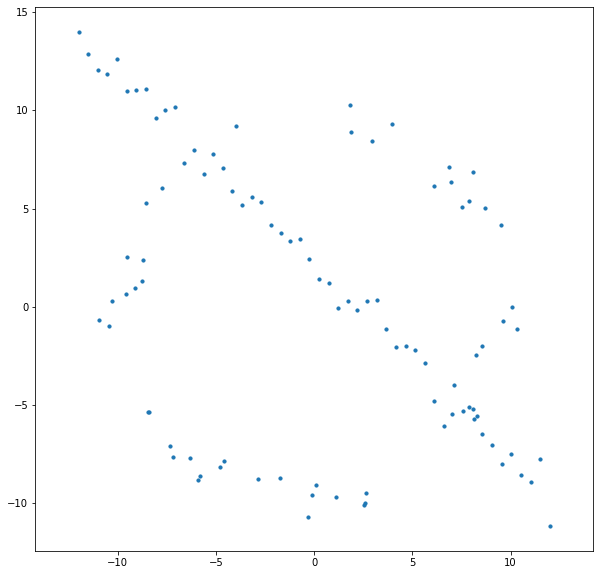

In [1]:
#1
import numpy as np
from scipy . optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt
# np . random . seed ( 0)
N = 100
half_n = N//2
r = 10
s = r/16
t = np.random.uniform(0, 2*np.pi, half_n)
n = s*np.random.randn(half_n)

x ,y = (r + n)*np.cos(t), (r + n)*np.sin(t)
X_circ = np.hstack(( x.reshape(half_n , 1), y.reshape(half_n , 1)))
m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n , 1 ) , y.reshape(half_n , 1 )))
X = np.vstack((X_circ, X_line ))

fig,ax=plt.subplots(1,1,sharex=True,sharey=True, figsize=(10,10))
X = np.vstack((X_circ, X_line ))
ax.scatter(X[:,0],X[:,1], s=10)
# ax.scatter(X_line[:,0],X_line[:,1], s=10)
ax.axis("equal")
plt.show()


In [2]:
def findCircle(x1, y1, x2, y2, x3, y3) :
    x12 = x1 - x2
    x13 = x1 - x3
 
    y12 = y1 - y2
    y13 = y1 - y3
 
    y31 = y3 - y1
    y21 = y2 - y1
 
    x31 = x3 - x1
    x21 = x2 - x1
 
    # x1^2 - x3^2
    sx13 = x1**2 - x3**2
 
    # y1^2 - y3^2
    sy13 = y1**2 - y3**2
 
    sx21 = x2**2 - x1**2
    sy21 = y2**2 - y1**2
 
    f = (((sx13)*(x12) + (sy13)*(x12) + (sx21)*(x13) + (sy21)*(x13)) / (2 *((y31)*(x12) - (y21)*(x13))))
             
    g = (((sx13)*(y12) + (sy13)*(y12) + (sx21)*(y13) + (sy21)*(y13)) / (2 * ((x31)*(y12) - (x21)*(y13))))
 
    c = (-x1**2 - y1**2 - 2*g*x1 - 2*f*y1)

    h = -g
    k = -f
    sqr_of_r = h * h + k * k - c
 
    # r is the radius
    r = round(np.sqrt(sqr_of_r), 5)
    return (r,h,k)
    print("Centre = (", h, ", ", k, ")")
    print("Radius = ", r)

1000


<ipython-input-2-0b68142183f0>:23: RuntimeWarning: invalid value encountered in double_scalars
  f = (((sx13)*(x12) + (sy13)*(x12) + (sx21)*(x13) + (sy21)*(x13)) / (2 *((y31)*(x12) - (y21)*(x13))))
<ipython-input-2-0b68142183f0>:25: RuntimeWarning: invalid value encountered in double_scalars
  g = (((sx13)*(y12) + (sy13)*(y12) + (sx21)*(y13) + (sy21)*(y13)) / (2 * ((x31)*(y12) - (x21)*(y13))))
<ipython-input-2-0b68142183f0>:23: RuntimeWarning: divide by zero encountered in double_scalars
  f = (((sx13)*(x12) + (sy13)*(x12) + (sx21)*(x13) + (sy21)*(x13)) / (2 *((y31)*(x12) - (y21)*(x13))))
<ipython-input-2-0b68142183f0>:25: RuntimeWarning: divide by zero encountered in double_scalars
  g = (((sx13)*(y12) + (sy13)*(y12) + (sx21)*(y13) + (sy21)*(y13)) / (2 * ((x31)*(y12) - (x21)*(y13))))
<ipython-input-2-0b68142183f0>:31: RuntimeWarning: invalid value encountered in double_scalars
  sqr_of_r = h * h + k * k - c


(9.56863, -0.4820335913758519, -0.14595576670417637)
61


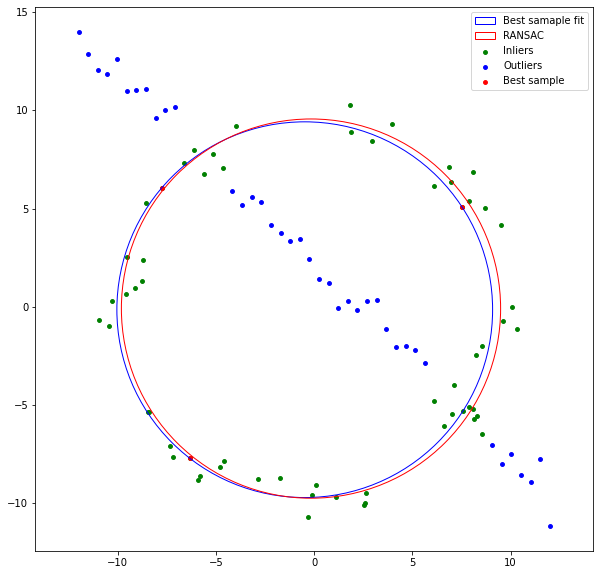

In [6]:
p = 0.99
t = 1.64*r/10
s= 3
e = 0.5

T = int(np.ceil(np.log(1-p)/np.log(1-(1-e)**s)))
T=1000
Tr =30
rng = np.random.default_rng()
# rng = np.arange(100)
# np.random.shuffle(rng)
# print(rng)
print(T)

finalInLiners =[]
finalOutLiners =[]
bestFitCircle = (0,0,0)
bestFitPoints = [[0,0],[0,0],[0,0]]

for i in range(T):

    inLiners = []
    outLiners = []

    
    x1,y1 = rng.choice(X,1,replace=False)[0]
    x2,y2 = rng.choice(X,1,replace=False)[0]
    x3,y3 = rng.choice(X,1,replace=False)[0]
    
    R,h,k = findCircle(x1, y1, x2, y2, x3, y3)

    if(R<Tr):
        if (t<R):
            for j,(xp,yp) in enumerate(X):
                d = np.sqrt((xp-h)**2 + (yp-k)**2)

                if ((R-t)<d<(R+t)):
                    inLiners.append(X[j])
                else:
                    outLiners.append(X[j])
        else:
            for j,(xp,yp) in enumerate(X):
                d = np.sqrt((xp-h)**2 + (yp-k)**2)

                if (d<(R+t)):
                    inLiners.append(X[j])
                else:
                    outLiners.append(X[j])   

        if(len(inLiners)>len(finalInLiners)):
            finalInLiners = inLiners
            finalOutLiners = outLiners 
            bestFitCircle = (R,h,k)
            bestFitPoints  = [[x1,y1],[x2,y2],[x3,y3]]


print(bestFitCircle)
print(len(finalInLiners))

circle = plt.Circle((bestFitCircle[1], bestFitCircle[2]), bestFitCircle[0], color='b', fill=False,label = "Best samaple fit")

finalInLiners = np.array(finalInLiners)
finalOutLiners = np.array(finalOutLiners)
bestFitPoints = np.array(bestFitPoints)

x = finalInLiners[:,0]
y = finalInLiners[:,1]

x_m = np.mean(x)
y_m = np.mean(y)

# calculation of the reduced coordinates
u = x - x_m
v = y - y_m

# linear system defining the center in reduced coordinates (uc, vc):
#    Suu * uc +  Suv * vc = (Suuu + Suvv)/2
#    Suv * uc +  Svv * vc = (Suuv + Svvv)/2
Suv  = np.sum(u*v)
Suu  = np.sum(u**2)
Svv  = np.sum(v**2)
Suuv = np.sum(u**2 * v)
Suvv = np.sum(u * v**2)
Suuu = np.sum(u**3)
Svvv = np.sum(v**3)

# Solving the linear system
A = np.array([ [ Suu, Suv ], [Suv, Svv]])
B = np.array([ Suuu + Suvv, Svvv + Suuv ])/2.0
uc, vc = np.linalg.solve(A, B)

xc_1 = x_m + uc
yc_1 = y_m + vc

# Calculation of all distances from the center (xc_1, yc_1)
Ri_1      = np.sqrt((x-xc_1)**2 + (y-yc_1)**2)
R_1       = np.mean(Ri_1)
residu_1  = np.sum((Ri_1-R_1)**2)
residu2_1 = np.sum((Ri_1**2-R_1**2)**2)

fig,ax=plt.subplots(1,1,sharex=True,sharey=True, figsize=(10,10))

ax.scatter(finalInLiners[:,0],finalInLiners[:,1], s=15,c='g',label = "Inliers")
ax.scatter(finalOutLiners[:,0],finalOutLiners[:,1], s=15, c='b',label = "Outliers")
ax.scatter(bestFitPoints[:,0],bestFitPoints[:,1], s=15 , c ='r',label = "Best sample")
ax.add_patch(circle)

theta_fit = np.linspace(-np.pi, np.pi, 180)

# x_fit1 = xc_1 + R_1*np.cos(theta_fit)
# y_fit1 = yc_1 + R_1*np.sin(theta_fit)
# ax.plot(x_fit1, y_fit1, 'b-' , lw=2,c = 'r',label = "RANSAC")

circle2 = plt.Circle((xc_1, yc_1), R_1, color='r', fill=False,label = "RANSAC")
ax.add_patch(circle2)

ax.legend()
ax.axis("equal")
plt.show()

[[341 174]
 [688  39]
 [817 252]
 [265 331]]
<class 'numpy.float64'>
[ 8.86583898e-04 -2.16366240e-03  8.90733560e-01 -1.41889597e-03
  8.93459972e-04  4.54509212e-01 -3.50209161e-06 -4.07112011e-06
  2.61212189e-03]
[[ 8.86583898e-04 -2.16366240e-03  8.90733560e-01]
 [-1.41889597e-03  8.93459972e-04  4.54509212e-01]
 [-3.50209161e-06 -4.07112011e-06  2.61212189e-03]]


True

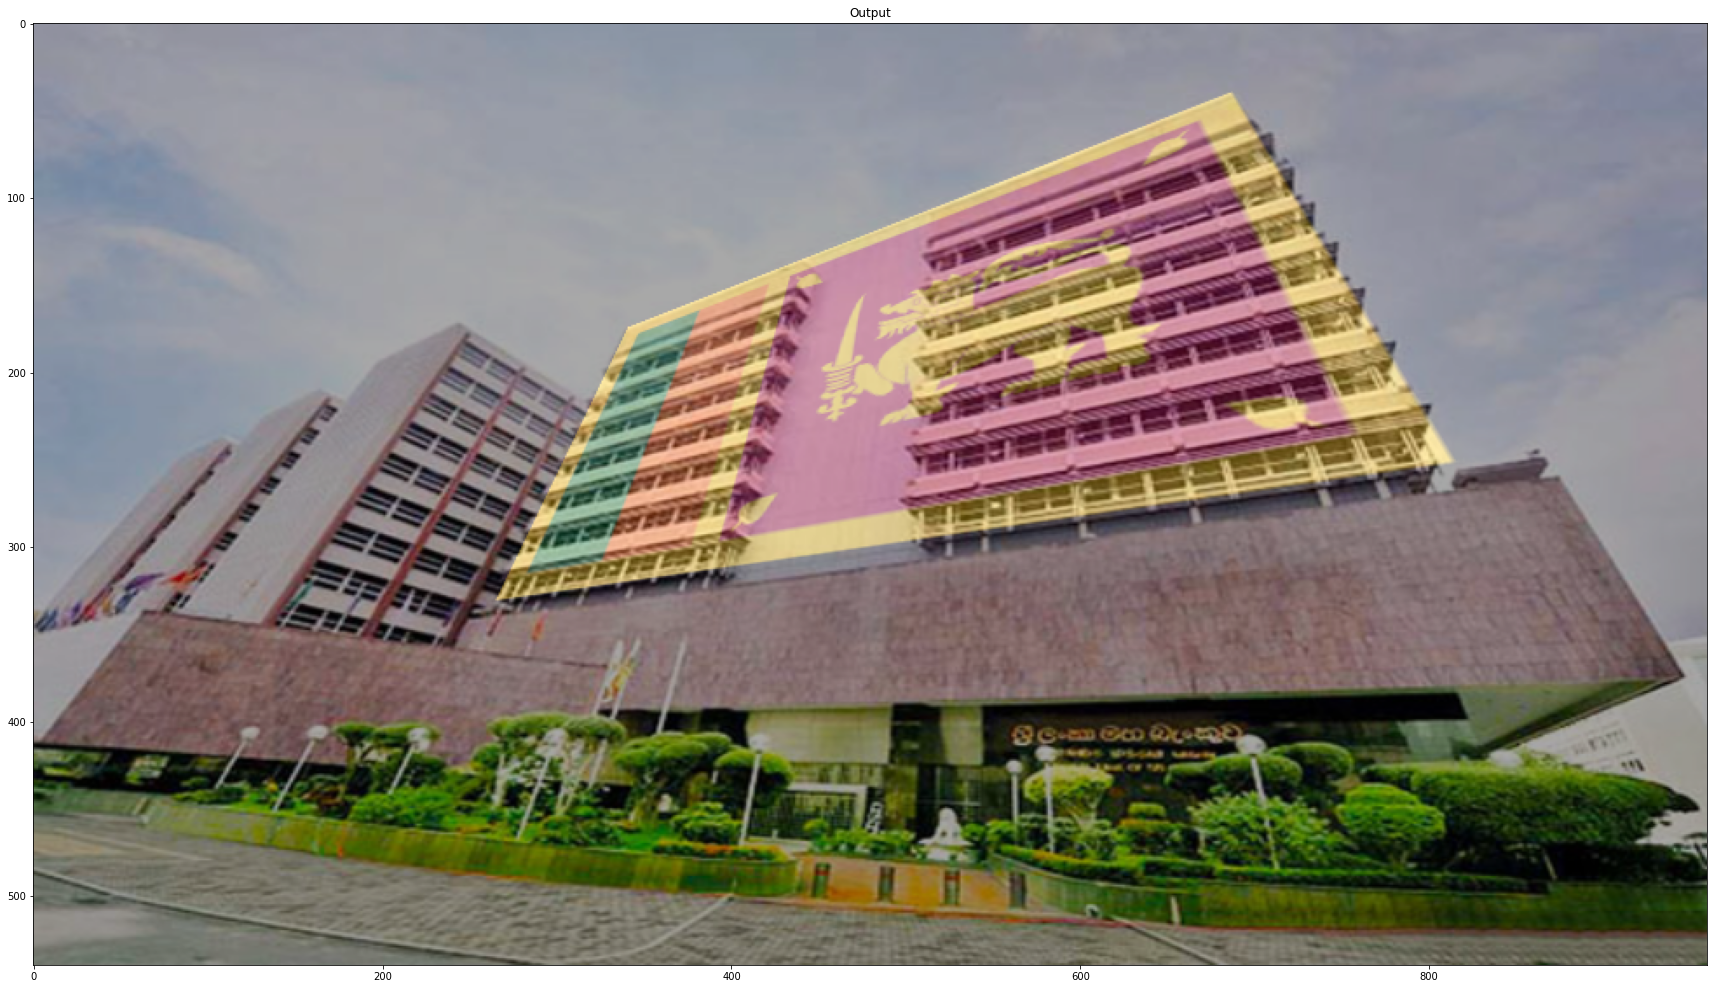

In [11]:
#2
import cv2 as cv
import numpy as np
import matplotlib . pyplot as plt
 
# Create point matrix get coordinates of mouse click on image
point_matrix = np.zeros((4,2),np.int)
 
counter = 0
def mousePoints(event,x,y,flags,params):
    global counter
    # Left button mouse click event opencv
    if event == cv.EVENT_LBUTTONDOWN:
        point_matrix[counter] = x,y
        counter = counter + 1
 
# Read image
Orgimg = cv.imread('images/cbsl.jpg')
Orgimg = cv.resize(Orgimg, (960, 540)) 
img = Orgimg.copy()

r = 0.5
# Showing original image
cv.imshow("Original Image ", img)
# cv.resizeWindow("Original Image ", int(img.shape[:2][1]*r), int(img.shape[:2][0]*r))
while True:

  
    if counter == 4:
        break
    # Mouse click event on original image
    cv.setMouseCallback("Original Image ", mousePoints)


    for x in range (0,4):
        cv.circle(img,(point_matrix[x][0],point_matrix[x][1]),3,(0,255,0),cv.FILLED)

    # Showing original image
    cv.imshow("Original Image ", img)
    # cv.resizeWindow("Original Image ", int(img.shape[:2][1]*r), int(img.shape[:2][0]*r))

    # Refreshing window all time
    cv.waitKey(1)




for x in range (0,4):
    cv.circle(img,(point_matrix[x][0],point_matrix[x][1]),3,(0,255,0),cv.FILLED)

# Showing original image
cv.imshow("Original Image ", img)

print(point_matrix)
# # cv.resizeWindow("Original Image ", int(img.shape[:2][1]*r), int(img.shape[:2][0]*r))
# starting_x = point_matrix[0][0]
# starting_y = point_matrix[0][1]

# ending_x = point_matrix[2][0]
# ending_y = point_matrix[2][1]
# # Draw rectangle for area of interest
# cv.rectangle(img, (starting_x, starting_y), (ending_x, ending_y), (0, 255, 0), 3)

# # Cropping image
# img_cropped = img[starting_y:ending_y, starting_x:ending_x]
# cv.imshow("ROI", img_cropped)
cv.waitKey(0)
cv.destroyAllWindows()

xd = np.array(point_matrix)
xd = np.concatenate((xd,np.ones((4,1))),1) 

img2 = cv.imread('images/Sriflag.png')

h0,w0 = img2.shape[:2]

x = np.array( [[0,0,1], [w0,0,1], [w0,h0,1], [0,h0,1]])


A = [] 
for i in range(4):
    A.append([0,0,0,x[i][0],x[i][1],x[i][2],-xd[i][1]*x[i][0],-xd[i][1]*x[i][1],-xd[i][1]*x[i][2]])
    A.append([x[i][0],x[i][1],x[i][2],0,0,0,-xd[i][0]*x[i][0],-xd[i][0]*x[i][1],-xd[i][0]*x[i][2]])


A = np.array(A)
print(type(A[0][0]))
W, V = np.linalg.eig(A.T @ A)

smallest_ev = V[:, np.argmin(W)]

print(smallest_ev)
H = np.reshape(smallest_ev,(3,3))
print(H)
img2to1 = cv.warpPerspective(img2, H,(img.shape[1],img.shape[0]))

# mask = np.zeros(img.shape, dtype=np.uint8)

# channel_count2 = img.shape[2]  
# ignore_mask_color2 = (255,)*channel_count2

# cv.fillConvexPoly(mask, np.int32(np.array(point_matrix)), ignore_mask_color2)


# mask = cv.bitwise_not(mask)

# print(img.shape)
# print(mask.shape)
# masked_image2 = cv.bitwise_and(Orgimg, mask)

# #Using Bitwise or to merge the two images
# final = cv.bitwise_or(img2to1, masked_image2)

alpha = 0.66
beta = 1-alpha
final = cv.addWeighted( Orgimg, alpha, img2to1, beta, 0.0)

fig,ax=plt.subplots(1,1,figsize=(30,30))
# ax[0].set_title('Image 1')
# ax[0].imshow(cv.cvtColor(Orgimg, cv.COLOR_BGR2RGB))
# ax[1].set_title('Image 2')
# ax[1].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
ax.set_title('Output')
ax.imshow(cv.cvtColor(final, cv.COLOR_BGR2RGB))

cv.imwrite('images/cbsln.jpg',final)



In [12]:
def findH(img1_points,img2_points):

    # print(type(xd[0][0]))

    x = np.array(img2_points)
    x = np.concatenate((x,np.ones((4,1))),1) 

    xd = np.array(img1_points)
    xd = np.concatenate((xd,np.ones((4,1))),1) 

    A = [] 
    for i in range(4):
        A.append([0,0,0,x[i][0],x[i][1],x[i][2],-xd[i][1]*x[i][0],-xd[i][1]*x[i][1],-xd[i][1]*x[i][2]])
        A.append([x[i][0],x[i][1],x[i][2],0,0,0,-xd[i][0]*x[i][0],-xd[i][0]*x[i][1],-xd[i][0]*x[i][2]])

    A = np.array(A)
    W, V = np.linalg.eig(A.T @ A)
    smallest_ev = V[:, np.argmin(W)]
    H = np.reshape(smallest_ev,(3,3))

    return H

In [14]:
#3
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img1 = cv.imread(r'graf/img1.ppm',cv.IMREAD_ANYCOLOR)
img5 = cv.imread(r'graf/img2.ppm',cv.IMREAD_ANYCOLOR)

#sift
sift = cv.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
keypoints_2, descriptors_2 = sift.detectAndCompute(img5,None)

print("keypoints", "descripters")
print(len(keypoints_1), descriptors_1.size)
print(len(keypoints_2), descriptors_2.size)

#feature matching
bf = cv.BFMatcher()

matches = bf.knnMatch(descriptors_1,descriptors_2,k=2)
matches = sorted(matches, key = lambda x:x[0].distance)
# print(matches)
print("N matches",len(matches))

# p = 0.99
# t = 50
# s= 4
# e = 0.8
rng = np.random.default_rng()

# #https://www.analyticsvidhya.com/blog/2019/10/detailed-guide-powerful-sift-technique-image-matching-python/

# T = int(np.ceil(np.log(1-p)/np.log(1-(1-e)**s)))
# print(T)
T = 10000

X = np.zeros((len(matches), 3))
Y = np.zeros((len(matches), 3))

for i, (m,n) in enumerate(matches):
    p1 = keypoints_1[m.queryIdx].pt
    p2 = keypoints_2[m.trainIdx].pt

    X[i,:] = np.array([p1[0], p1[1], 1])
    Y[i,:] = np.array([p2[0], p2[1], 1])

XT = X.T
YT = Y.T

# print(XT)
goodMatches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        goodMatches.append(m)

matches = np.array(goodMatches)

bestCount = 0
bestH = []

for t in range(T):

    x = rng.choice(matches,size = 4,replace=False)

    img1_points = []
    img5_points = []

    # print
    for i in range(4):
        img1_points.append(keypoints_1[x[i].queryIdx].pt)
        img5_points.append(keypoints_2[x[i].trainIdx].pt)

    # print("t: ",t)

    H =  findH(img1_points,img5_points)

    H = np.linalg.pinv(H)

    xEst =  H @ XT #np.linalg.pinv(H), Hn
    xEst = xEst/xEst[2,:]
    err = YT - xEst
    err = np.sqrt(np.sum(np.square(err),axis =0))
    
    # print("err: ",err)

    tempCount = np.where(err <= 1)[0].shape[0]
        
    if(tempCount>bestCount):
        bestCount = tempCount
        bestH = H

    # print("best count: ",bestCount)

print("bestH : " ,bestH)
print("best count: ",bestCount)

xEst = bestH @ XT
xEst = xEst/xEst[2,:]
err = YT - xEst
err = np.sqrt(np.sum(np.square(err),axis =0))
inLiners = np.where(err <= 1)

keypoints descripters
2674 342272
3062 391936
N matches 2674
bestH :  [[-1.49553752e+02 -5.28398759e+01  6.56416474e+03]
 [ 3.13532861e+01 -1.59215850e+02 -2.61859123e+04]
 [-3.33577149e-02  3.71520864e-03 -1.70412711e+02]]
best count:  882


In [15]:
def findHN(xd,x,N):

    # print(type(xd[0][0]))

    A = [] 
    for i in range(N):
        A.append([0,0,0,x[i][0],x[i][1],x[i][2],-xd[i][1]*x[i][0],-xd[i][1]*x[i][1],-xd[i][1]*x[i][2]])
        A.append([x[i][0],x[i][1],x[i][2],0,0,0,-xd[i][0]*x[i][0],-xd[i][0]*x[i][1],-xd[i][0]*x[i][2]])

    A = np.array(A)
    print(A.shape)
    W, V = np.linalg.eig(A.T @ A)
    smallest_ev = V[:, np.argmin(W)]
    H = np.reshape(smallest_ev,(3,3))

    return H

(882, 3)
(882, 3)
882
(1764, 9)
[[ 5.53603515e-03  1.95682802e-03 -2.43657054e-01]
 [-1.16211818e-03  5.89838635e-03  9.69804529e-01]
 [ 1.22703354e-06 -1.27312794e-07  6.30852138e-03]]


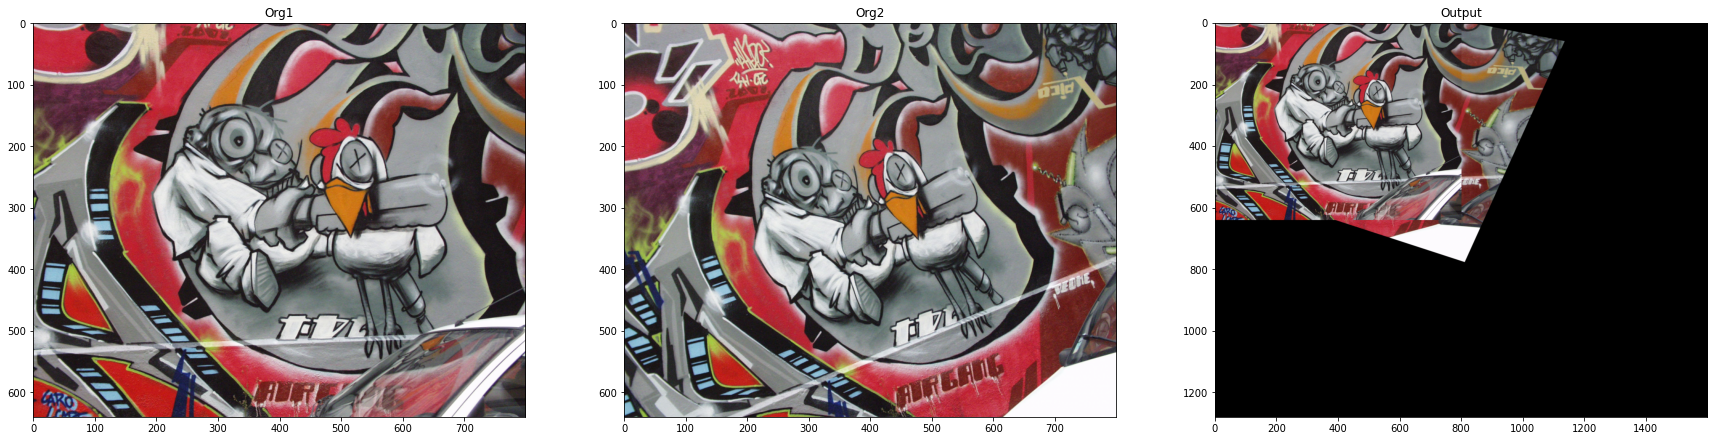

In [16]:
xd =Y[inLiners[0]]
print(xd.shape)

x = X[inLiners[0]]
print(x.shape)
N = x.shape[0]
print(N)

# Apply panorama correction
width = img5.shape[1] + img1.shape[1]
height = img5.shape[0] + img1.shape[0]

# H, Mask = cv.findHomography(xd, x, cv.RANSAC,5.0)
H = findHN(xd,x,N)

print(H)


result = cv.warpPerspective(img5, np.linalg.inv(H),(width, height))
result[0:img1.shape[0], 0:img1.shape[1]] = img1



Hd =[]
with open(r'graf/H1to2p') as f:
    Hd = np.array([[float(h) for h in line.split()] for line in f]) 


fig,ax=plt.subplots(1,3,figsize=(30,10))

ax[2].set_title('Output')
ax[2].imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))

ax[0].set_title('Org1')
ax[0].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))

ax[1].set_title('Org2')
ax[1].imshow(cv.cvtColor(img5, cv.COLOR_BGR2RGB))

In [17]:
#3
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


def ransac(s1,s2):
    # img1 = cv.imread(r'graf/img1.ppm',cv.IMREAD_ANYCOLOR)
    # img5 = cv.imread(r'graf/img2.ppm',cv.IMREAD_ANYCOLOR)
    img1 = cv.imread(r'graf/img'+s1+'.ppm',cv.IMREAD_ANYCOLOR)
    img5 = cv.imread(r'graf/img'+s2+'.ppm',cv.IMREAD_ANYCOLOR)

    #sift
    sift = cv.SIFT_create()

    keypoints_1, descriptors_1 = sift.detectAndCompute(img1,None)
    keypoints_2, descriptors_2 = sift.detectAndCompute(img5,None)

    print("keypoints", "descripters")
    print(len(keypoints_1), descriptors_1.size)
    print(len(keypoints_2), descriptors_2.size)

    #feature matching
    bf = cv.BFMatcher()

    matches = bf.knnMatch(descriptors_1,descriptors_2,k=2)
    matches = sorted(matches, key = lambda x:x[0].distance)
    # print(matches)
    print("N matches",len(matches))

    # p = 0.99
    # t = 50
    # s= 4
    # e = 0.8
    rng = np.random.default_rng()

    # #https://www.analyticsvidhya.com/blog/2019/10/detailed-guide-powerful-sift-technique-image-matching-python/

    # T = int(np.ceil(np.log(1-p)/np.log(1-(1-e)**s)))
    # print(T)
    T = 10000

    X = np.zeros((len(matches), 3))
    Y = np.zeros((len(matches), 3))

    for i, (m,n) in enumerate(matches):
        p1 = keypoints_1[m.queryIdx].pt
        p2 = keypoints_2[m.trainIdx].pt

        X[i,:] = np.array([p1[0], p1[1], 1])
        Y[i,:] = np.array([p2[0], p2[1], 1])

    XT = X.T
    YT = Y.T

    # print(XT)
    goodMatches = []
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            goodMatches.append(m)

    matches = np.array(goodMatches)

    bestCount = 0
    bestH = []

    for t in range(T):

        x = rng.choice(matches,size = 4,replace=False)

        img1_points = []
        img5_points = []

        # print
        for i in range(4):
            img1_points.append(keypoints_1[x[i].queryIdx].pt)
            img5_points.append(keypoints_2[x[i].trainIdx].pt)

        # print("t: ",t)

        H =  findH(img1_points,img5_points)

        H = np.linalg.pinv(H)

        xEst =  H @ XT #np.linalg.pinv(H), Hn
        xEst = xEst/xEst[2,:]
        err = YT - xEst
        err = np.sqrt(np.sum(np.square(err),axis =0))
        
        # print("err: ",err)

        tempCount = np.where(err <= 1)[0].shape[0]
            
        if(tempCount>bestCount):
            bestCount = tempCount
            bestH = H

        # print("best count: ",bestCount)

    print("bestH : " ,bestH)
    print("best count: ",bestCount)

    xEst = bestH @ XT
    xEst = xEst/xEst[2,:]
    err = YT - xEst
    err = np.sqrt(np.sum(np.square(err),axis =0))
    inLiners = np.where(err <= 1)

   
    xd =Y[inLiners[0]]
    print(xd.shape)

    x = X[inLiners[0]]
    print(x.shape)
    N = x.shape[0]
    print(N)

    H = findHN(xd,x,N)

    print(H)

    return H


keypoints descripters
2674 342272
3668 469504
N matches 2674
bestH :  [[-1.33182874e+02 -1.38545347e+02  6.22825303e+03]
 [ 3.16768677e+01 -1.98233171e+02 -3.04764552e+04]
 [-7.99475313e-02 -1.27085911e-03 -2.03121751e+02]]
best count:  95
(95, 3)
(95, 3)
95
(190, 9)
[[ 4.28267607e-03  4.44165118e-03 -1.99163583e-01]
 [-1.00474147e-03  6.34970439e-03  9.79904026e-01]
 [ 2.61386017e-06 -5.35421830e-09  6.52452900e-03]]
keypoints descripters
3668 469504
3923 502144
N matches 3668
bestH :  [[-2.89684619e+02  1.76061305e+02 -1.33504709e+05]
 [-2.56567478e+02 -3.44599381e+02  5.39847028e+04]
 [-3.15444669e-02  3.65751291e-02 -4.46872148e+02]]
best count:  751
(751, 3)
(751, 3)
751
(1502, 9)
[[ 2.00982911e-03 -1.22041362e-03  9.26630729e-01]
 [ 1.78163194e-03  2.39795605e-03 -3.75940705e-01]
 [ 2.14928219e-07 -2.45063285e-07  3.10245994e-03]]


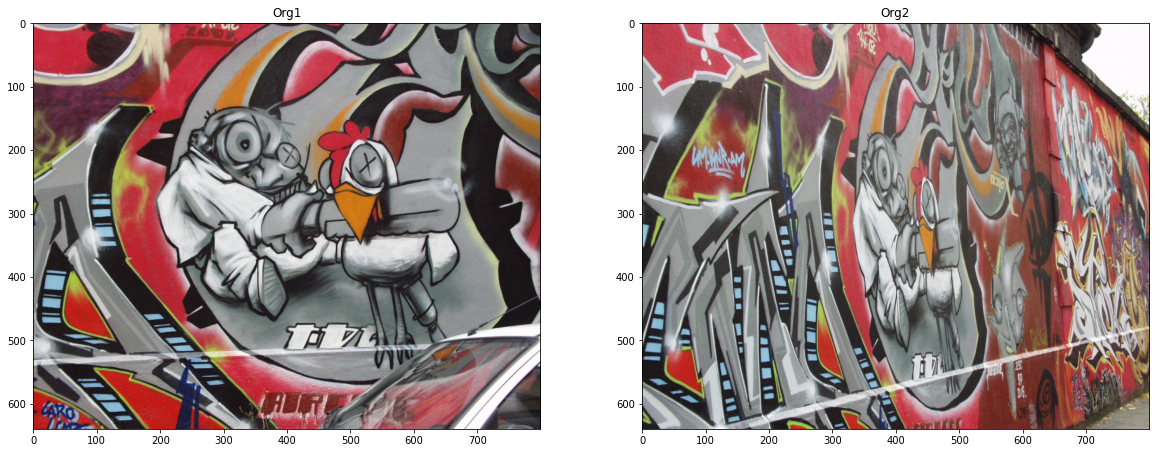

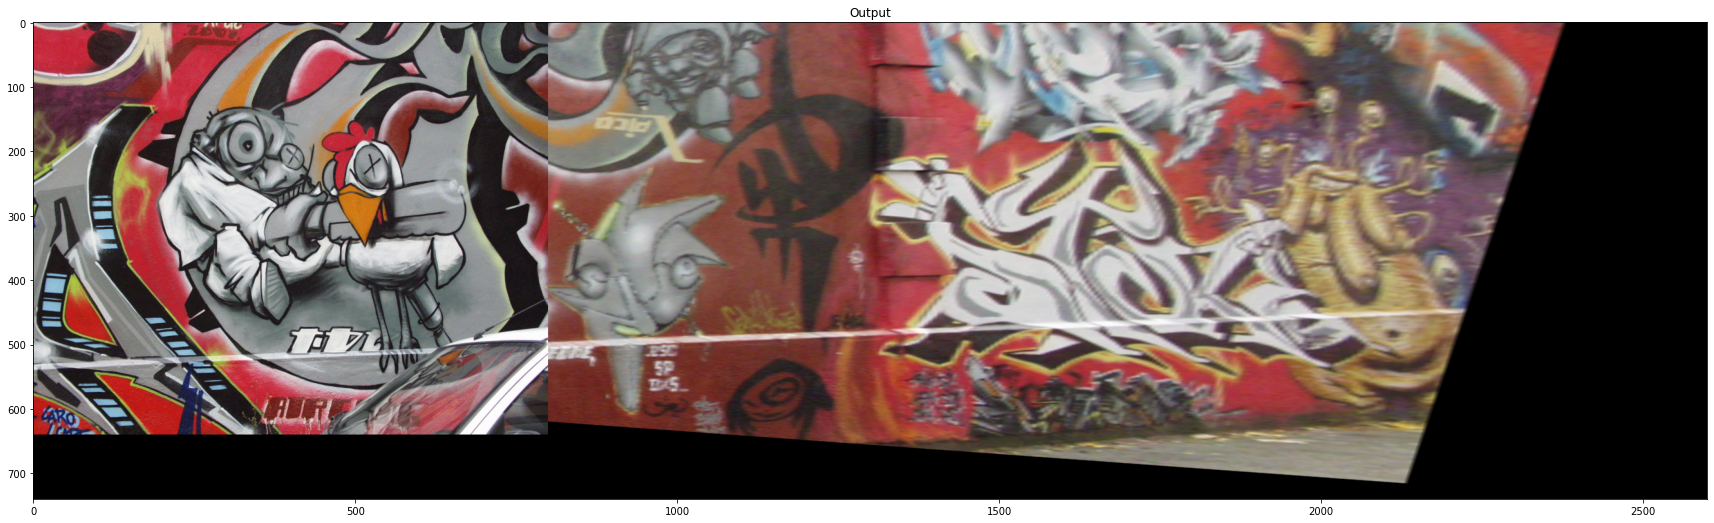

In [18]:
H1 = ransac('1','4')
H2 = ransac('4','5')

img1 = cv.imread(r'graf/img1.ppm',cv.IMREAD_ANYCOLOR)
img5 = cv.imread(r'graf/img5.ppm',cv.IMREAD_ANYCOLOR)

width = img5.shape[1] + img1.shape[1]+1000
height = img1.shape[0]+100
H = H2@H1 
# result = cv.warpPerspective(img5, np.linalg.inv(H),(width, height))
result = cv.warpPerspective(img5, np.linalg.inv(H),(width, height),flags = cv.INTER_LINEAR + cv.BORDER_CONSTANT)
result[0:img1.shape[0], 0:img1.shape[1]] = img1

fig,ax=plt.subplots(1,2,figsize=(20,10))

ax[0].set_title('Org1')
ax[0].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))

ax[1].set_title('Org2')
ax[1].imshow(cv.cvtColor(img5, cv.COLOR_BGR2RGB))

fig,ax=plt.subplots(1,1,figsize=(30,10))
ax.set_title('Output')
ax.imshow(cv.cvtColor(result, cv.COLOR_BGR2RGB))